# Análisis ConnectaTel

Como **analista de datos**, tu objetivo es evaluar el **comportamiento de los clientes** de una empresa de telecomunicaciones en Latinoamérica, ConnectaTel. 

Trabajaremos con información registrada **hasta el año 2024**, lo cual permitirá analizar el comportamiento del negocio dentro de ese periodo.

Para ello trabajarás con tres datasets:  

- **plans.csv** → información de los planes actuales (precio, minutos incluidos, GB incluidos, costo por extra)  
- **users.csv** → información de los clientes (edad, ciudad, fecha de registro, plan, churn)  
- **usage.csv** → detalle del **uso real** de los servicios (llamadas y mensajes)  

Deberás **explorar**, **limpiar** y **analizar** estos datos para construir un **perfil estadístico** de los clientes, detectar **comportamientos atípicos** y crear **segmentos de clientes**.  

Este análisis te permitirá **identificar patrones de consumo**, **diseñar estrategias de retención** y **sugerir mejoras en los planes** ofrecidos por la empresa.

> 💡 Antes de empezar, recuerda pensar de forma **programática**: ¿qué pasos necesitas? ¿En qué orden? ¿Qué quieres medir y por qué?


--- 
## 🧩 Paso 1: Cargar y explorar

Antes de limpiar o combinar los datos, es necesario **familiarizarte con la estructura de los tres datasets**.  
En esta etapa, validarás que los archivos se carguen correctamente, conocerás sus columnas y tipos de datos, y detectarás posibles inconsistencias.

### 1.1 Carga de datos y vista rápida

**🎯 Objetivo:**  
Tener los **3 datasets listos en memoria**, entender su contenido y realizar una revisión preliminar.

**Instrucciones:**  
- Importa las librerías necesarias (por ejemplo `pandas`, `seaborn`, `matplotlib.pyplot`)
- Carga los archivos CSV usando `pd.read_csv()`:
  - **`/datasets/plans.csv`**  
  - **`/datasets/users_latam.csv`**  
  - **`/datasets/usage.csv`**  
- Guarda los DataFrames en las variables: `plans`, `users`, `usage`.  
- Muestra las primeras filas de cada DataFrame usando `.head()`.


In [71]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [72]:
# cargar archivos
plans = pd.read_csv('/datasets/plans.csv')
users = pd.read_csv('/datasets/users_latam.csv')
usage = pd.read_csv('/datasets/usage.csv')

In [73]:
plans.head(5)

,plan_name,messages_included,gb_per_month,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,Basico,100,5,100,12,1.2,0.08,0.10
1,Premium,500,20,600,25,1.0,0.05,0.07


In [74]:
users.head(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,10000,Carlos,Garcia,38,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN
1,10001,Mateo,Torres,53,?,2022-01-01 06:34:17.914478619,Basico,NaN
2,10002,Sofia,Ramirez,57,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN
3,10003,Mateo,Ramirez,69,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN
4,10004,Mateo,Torres,63,GDL,2022-01-02 02:17:11.657914478,Basico,NaN


In [75]:
usage.head(5)

,id,user_id,type,date,duration,length
0,1,10332,call,2024-01-01 00:00:00.000000000,0.09,NaN
1,2,11458,text,2024-01-01 00:06:30.969774244,NaN,39.0
2,3,11777,text,2024-01-01 00:13:01.939548488,NaN,36.0
3,4,10682,call,2024-01-01 00:19:32.909322733,1.53,NaN
4,5,12742,call,2024-01-01 00:26:03.879096977,4.84,NaN


**Tip:** Si no usas `print()` la tabla se vera mejor.

### 1.2 Exploración de la estructura de los datasets

**🎯 Objetivo:**  
Conocer la **estructura de cada dataset**, revisar cuántas filas y columnas tienen, identificar los **tipos de datos** de cada columna y detectar posibles **inconsistencias o valores nulos** antes de iniciar el análisis.

**Instrucciones:**  
- Revisa el **número de filas y columnas** de cada dataset usando `.shape`.  
- Usa `.info()` en cada DataFrame para obtener un **resumen completo** de columnas, tipos de datos y valores no nulos.  

In [76]:
# revisar el número de filas y columnas de cada dataset
print("plans", plans.shape)
print("users", users.shape)
print("usage", usage.shape)

plans (2, 8)
users (4000, 8)
usage (40000, 6)


In [77]:
print("plans", plans.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   plan_name          2 non-null      object 
 1   messages_included  2 non-null      int64  
 2   gb_per_month       2 non-null      int64  
 3   minutes_included   2 non-null      int64  
 4   usd_monthly_pay    2 non-null      int64  
 5   usd_per_gb         2 non-null      float64
 6   usd_per_message    2 non-null      float64
 7   usd_per_minute     2 non-null      float64
dtypes: float64(3), int64(4), object(1)
memory usage: 256.0+ bytes
plans None


In [78]:
print("users", users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     4000 non-null   int64 
 1   first_name  4000 non-null   object
 2   last_name   4000 non-null   object
 3   age         4000 non-null   int64 
 4   city        3531 non-null   object
 5   reg_date    4000 non-null   object
 6   plan        4000 non-null   object
 7   churn_date  466 non-null    object
dtypes: int64(2), object(6)
memory usage: 250.1+ KB
users None


In [79]:
print("usage", usage.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        40000 non-null  int64  
 1   user_id   40000 non-null  int64  
 2   type      40000 non-null  object 
 3   date      39950 non-null  object 
 4   duration  17924 non-null  float64
 5   length    22104 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 1.8+ MB
usage None


---

## 🧩Paso 2: Identificación de problemas de calidad de datos

### 2.1 Revisión de valores nulos

**🎯 Objetivo:**  
Detectar la presencia y magnitud de valores faltantes para evaluar si afectan el análisis o requieren imputación/eliminación.

**Instrucciones:**  
- Cuenta valores nulos por columna para cada dataset.
- Calcula la proporción de nulos por columna para cada dataset.

El dataset `plans` solamente tiene 2 renglones y se puede observar que no tiene ausentes, por ello no necesita exploración adicional.

<br>
<details>
<summary>Haz clic para ver la pista</summary>
Usa `.isna().sum()` para contar valores nulos y usa `.isna().mean()` para calcular la proporción.

In [80]:
# cantidad de nulos para users
print(users.isna().sum())
print(users.isna().mean())

user_id          0
first_name       0
last_name        0
age              0
city           469
reg_date         0
plan             0
churn_date    3534
dtype: int64
user_id       0.00000
first_name    0.00000
last_name     0.00000
age           0.00000
city          0.11725
reg_date      0.00000
plan          0.00000
churn_date    0.88350
dtype: float64


In [81]:
print(usage.isna().sum())
print(usage.isna().mean())

id              0
user_id         0
type            0
date           50
duration    22076
length      17896
dtype: int64
id          0.00000
user_id     0.00000
type        0.00000
date        0.00125
duration    0.55190
length      0.44740
dtype: float64


✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico al final del bloque. Incluye qué ves y que acción recomendarías para cada caso.

💡 **Nota:** Justifica tus decisiones brevemente (1 línea por caso).
* Hint:
 - Si una columna tiene **más del 80–90% de nulos**, normalmente se **ignora o elimina**.  
 - Si tiene **entre 5% y 30%**, generalmente se **investiga para imputar o dejar como nulos**.  
 - Si es **menor al 5%**, suele ser un caso simple de imputación o dejar como nulos. 
 
 ---

**Valores nulos** 

- En el dataset de users tenemos valores nulos en las siguientes columnas:
  - city(0.11725): se recomienda investigar para imputar o dejar como nulos ya que tiene un porcentaje entre 5% y 30     de datos nulos. 
  - churn_date(0.88350): se recomienda ignorar o eliminar estos valores ya que tiene un porcentaje con mas del 80%       de datos nulos. 

- En el dataset de usage tenemos valores nulos en las siguientes columnas:

  - date (0.00125): se recomienda imputar o dejar como nulos ya que tiene un porcentaje menor al 5% de valores           nulos.
  - duration (0.55190): se recomienda investigar para imputar o dejar como nulos.
  - length (0.44740): se recomienda investigar para imputar o dejar como nulos.  


### 2.2 Detección de valores inválidos y sentinels

🎯 **Objetivo:**  
Identificar sentinels: valores que no deberían estar en el dataset.

**Instrucciones:**
- Explora las columnas numéricas con **un resumen estadístico** y describe brevemente que encontraste.
- Explora las columnas categóricas **relevantes**, revisando sus valores únicos y describe brevemente que encontraste.


El dataset `plans` solamente tiene 2 renglones, por ello no necesita exploración adicional.

In [82]:
users.describe()

,user_id,age
count,4000.000000,4000.000000
mean,11999.500000,33.739750
std,1154.844867,123.232257
min,10000.000000,-999.000000
25%,10999.750000,32.000000
50%,11999.500000,47.000000
75%,12999.250000,63.000000
max,13999.000000,79.000000


- La columna `user_id` tiene 4000 registros, sin valores nulos. Esta columna es solo un identificador unico para cada usuario. 
- La columna `age` contiene 4,000 registros, pero presenta problemas de calidad, incluyendo un valor mínimo inválido (-999) que indica datos faltantes o errores. La mediana (47 años) sugiere que la población es mayormente adulta, mientras que la desviación estándar extremadamente alta indica la presencia de outliers. Se recomienda limpiar valores inválidos antes de realizar análisis inferenciales.

In [83]:
usage.describe()

,id,user_id,duration,length
count,40000.00000,40000.000000,17924.000000,22104.000000
mean,20000.50000,12002.405975,5.202237,52.127398
std,11547.14972,1157.279564,6.842701,56.611183
min,1.00000,10000.000000,0.000000,0.000000
25%,10000.75000,10996.000000,1.437500,37.000000
50%,20000.50000,12013.000000,3.500000,50.000000
75%,30000.25000,13005.000000,6.990000,64.000000
max,40000.00000,13999.000000,120.000000,1490.000000


- Las columnas `id` y `user_id` funcionan como identificadores de filas y usuarios. Sus estadísticas descriptivas no tienen valor analítico, ya que no representa una variable real, solo orden o referencia.
- La columna `duration` tiene muchos datos faltantes, de 4000 solo tenemos 17924 registros lo cual sugiere problemas de calidad o registros incompletos. La mayoría de las duraciones son cortas, pero existen algunos valores extremos que elevan la media haciendo que la distribución está sesgada hacia valores altos.
- La columna `length` muestra una distribución relativamente consistente, pero con outliers extremos que podrían ser errores o casos excepcionales. La gran cantidad de valores faltantes indica posibles problemas de captura de datos.

In [84]:
# explorar columnas categóricas de users

columnas_user = ['city', 'plan']
users[columnas_user].value_counts()


city      plan   
Bogotá    Basico     522
CDMX      Basico     474
Medellín  Basico     398
GDL       Basico     298
Bogotá    Premium    286
MTY       Basico     275
Cali      Basico     262
CDMX      Premium    256
Medellín  Premium    218
Cali      Premium    162
GDL       Premium    152
MTY       Premium    132
?         Basico      65
          Premium     31
dtype: int64

- La columna `city` representa la distribución de registros por ciudad. Bogotá es la ciudad con mayor número de registros, seguida por CDMX y Medellín. También aparecen ciudades con menor representación como GDL y MTY, y existe una categoría “?” y " " que sugiere valores desconocidos o errores de captura, lo cual indica la necesidad de limpieza de datos.
- La columna `plan` indica el tipo de plan contratado por los usuarios. El plan “Basico” es el más frecuente en todas las ciudades, mientras que el plan “Premium” tiene una menor proporción de registros. Esto sugiere que la mayoría de los usuarios opta por opciones más económicas, aunque existe un segmento relevante en planes premium.
  

In [85]:
# explorar columna categórica de usage
usage['type'].value_counts() 

text    22092
call    17908
Name: type, dtype: int64

- La columna `type` muestra el tipo de interacción. Hay dos categorías: text y call. Se puede ver que los mensajes de texto son más comunes que las llamadas, lo que sugiere que la mayoría de usuarios prefiere escribir en lugar de llamar.


---
✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico. Incluye qué ves y que acción recomendarías para cada caso. 

**Valores inválidos o sentinels**  
- En la columna `age` aparece el valor -999, que claramente no representa una edad real y probablemente se usa como sentinel para datos faltantes.
- En la columna `city` aparece la categoría "?", lo que sugiere ciudades desconocidas o errores de captura.
- En las columnas `duration` y `length` hay muchos valores faltantes y algunos valores 0, que podrían representar registros incompletos o mediciones inválidas.
- Además, en `duration` y `length` se observan valores extremadamente altos, que podrían ser outliers o errores.

**Acciones a tomar**

- En `age`, reemplazaría -999 por NaN o lo eliminaría del análisis para evitar distorsionar las estadísticas.
- En `city`, reemplazaría "?" por NaN o la etiquetaría como “Unknown”, dependiendo del contexto del análisis.
- En `duration` y `length`, revisaría los valores 0 y los extremos para decidir si deben corregirse, eliminarse o mantenerse si son casos válidos.
- En general, limpiaría los valores inválidos antes de hacer cualquier análisis, para asegurar que los resultados sean más confiables.

### 2.3 Revisión y estandarización de fechas

**🎯 Objetivo:**  
Asegurar que las columnas de fecha estén correctamente formateadas y detectar años fuera de rango que indiquen errores de captura.

**Instrucciones:**  
- Convierte las columnas de fecha a tipo fecha y asegurate de que el código sea a prueba de errores.
- Revisa cuántas veces aparece cada año.
- Identifica fechas imposibles (ej. años futuros o negativos).

Toma en cuenta que tenemos datos registrados hasta el año 2024.

In [86]:
# Convertir a fecha la columna `reg_date` de users
users['reg_date'] = pd.to_datetime(users['reg_date'], errors = 'coerce')

In [87]:
# Convertir a fecha la columna `date` de usage
usage['date'] = pd.to_datetime(usage['date'], errors = 'coerce')

In [88]:
# Revisar los años presentes en `reg_date` de users
users['reg_date'].dt.year.value_counts().sort_index()

2022    1314
2023    1316
2024    1330
2026      40
Name: reg_date, dtype: int64

En `reg_date`, aparecen 40 registros imposibles con año 2026 que aún no ha transcurrido.

In [89]:
usage['date'].dt.year.value_counts().sort_index()


2024.0    39950
Name: date, dtype: int64

En usage `date`, solo tenemos registros del uso del año 2024. No tenemos registros de años anteriores. Por lo cual, solo podemos analizar el comportamiento de los usuarios en el año 2024 a pesar de que se registraron usuarios desde el año 2022.

✍️ **Comentario**: escribe tu diagnóstico, e incluye **qué acción recomendarías** para cada caso:


**Fechas fuera de rango**  

- En la columna users reg_date se identificaron 40 registros con año 2026, un valor imposible, ya que dicho año aún no ha transcurrido. Además, hay registros desde 2022, 2023 y 2024.
- En la columna usage date (uso de la plataforma) solo existen registros del año 2024, lo que indica que no se cuenta con datos de años anteriores, pese a que algunos usuarios se registraron antes.

**Acción recomendada:**

- Para los registros de users reg_date con año 2026, sugeriría marcarlos como valores inválidos y corregirlos si es posible (por ejemplo, verificando la fuente original), o eliminarlos si no se puede determinar la fecha correcta.
- Los registros con años anteriores (2022-2023) pueden mantenerse, pero el análisis del comportamiento del usuario debe limitarse a los datos de date del año 2024, ya que son los únicos disponibles para observar actividad real.

---

## 🧩Paso 3: Limpieza básica de datos

### 3.1 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Aplicar reglas de limpieza para reemplazar valores sentinels y corregir fechas imposibles.

**Instrucciones:**  
- En `age`, reemplaza el sentinel **-999** con la mediana.
- En `city`, reemplaza el sentinel `"?"` por valores nulos (`pd.NA`).  
- Marca como nulas (`pd.NA`) las fechas fuera de rango.

In [90]:
# Reemplazar -999 por la mediana de age
age_mediana = users['age'].median()
users['age'] = users['age'].replace(-999,age_mediana)

# Verificar cambios
users['age'].describe()
print("valor '-999' restantes:", (users['age'] == '-999').sum())

valor '-999' restantes: 0


In [91]:
# Reemplazar ? por NA en city
users['city'] = users['city'].replace('?', pd.NA)

# Verificar cambios
print(users['city'].head(5))
print("Valores '?' restantes:", (users['city'] == '?').sum())

0    Medellín
1        <NA>
2        CDMX
3      Bogotá
4         GDL
Name: city, dtype: object
Valores '?' restantes: 0


In [92]:
# Marcar fechas futuras como NA para reg_date
fechas_futuras = users['reg_date']> '2024-12-31'
users.loc[fechas_futuras, 'reg_date'] = pd.NaT

# Verificar cambios
print(users['reg_date'].dtype)
print(users['reg_date'].head())


datetime64[ns]
0   2022-01-01 00:00:00.000000000
1   2022-01-01 06:34:17.914478619
2   2022-01-01 13:08:35.828957239
3   2022-01-01 19:42:53.743435858
4   2022-01-02 02:17:11.657914478
Name: reg_date, dtype: datetime64[ns]


### 3.2 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Decidir qué hacer con los valores nulos según su proporción y relevancia.

**Instrucciones:**
- Verifica si los nulos en `duration` y `length` son **MAR**(Missing At Random) revisando si dependen de la columna `type`.  
  Si confirmas que son MAR, **déjalos como nulos** y justifica la decisión.

In [93]:
# Verificación MAR en usage (Missing At Random) para duration
usage['duration'].isna().groupby(usage['type']).mean()

type
call    0.000000
text    0.999276
Name: duration, dtype: float64

In [94]:
# Verificación MAR en usage (Missing At Random) para length
usage['length'].isna().groupby(usage['type']).mean()


type
call    0.99933
text    0.00000
Name: length, dtype: float64

Los valores nulos en `duration` y `length` no parecen ser aleatorios, ya que dependen claramente de la columna type.
Cuando el tipo es call, casi todos los valores de length son nulos, mientras que duration sí tiene datos. En cambio, cuando el tipo es text, ocurre lo contrario: duration es casi siempre nulo y length tiene valores completos.

Esto tiene sentido porque las llamadas necesitan una duración, pero no una longitud de texto, y los mensajes de texto necesitan una longitud, pero no una duración.

Los nulos son MAR (Missing At Random) y son esperados por la naturaleza del tipo de dato, por lo que se dejan como están y no se consideran un error.

---

## 🧩Paso 4: Summary statistics de uso por usuario


### 4.1 Agrupación por comportamiento de uso

🎯**Objetivo**: Resumir las variables clave de la tabla `usage` **por usuario**, creando métricas que representen su comportamiento real de uso histórico. 

**Instrucciones:**: 
1. Construye una tabla agregada de `usage` por `user_id` que incluya:
- número total de mensajes  
- número total de llamadas  
- total de minutos de llamadas

2. Renombra las columnas para que tengan nombres claros:  
- `cant_mensajes`  
- `cant_llamadas`  
- `cant_minutos_llamada`
3. Combina esta tabla con `users`.

In [95]:
# Columnas auxiliares
usage["is_text"] = (usage["type"] == "text").astype(int) #conocer el total de mensajes
usage["is_call"] = (usage["type"] == "call").astype(int) #conocer el total de llamadas


# Agrupar información por usuario
usage_agg = usage.groupby('user_id')['is_text','is_call', 'duration'].sum().reset_index()

# observar resultado
usage_agg.head(3)

,user_id,is_text,is_call,duration
0,10000,7,3,23.70
1,10001,5,10,33.18
2,10002,5,2,10.74


In [97]:
# Renombrar columnas
usage_agg.rename(columns={'is_text': 'cant_mensajes', 'is_call': 'cant_llamadas', 'duration': 'cant_minutos_llamada'}, inplace=True)
# observar resultado
usage_agg.head(3)

,user_id,cant_mensajes,cant_llamadas,cant_minutos_llamada
0,10000,7,3,23.70
1,10001,5,10,33.18
2,10002,5,2,10.74


In [98]:
# Combinar la tabla agregada con el dataset de usuarios
user_profile = users.merge(usage_agg, on='user_id')
user_profile.head(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,7,3,23.70
1,10001,Mateo,Torres,53.0,<NA>,2022-01-01 06:34:17.914478619,Basico,NaN,5,10,33.18
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5,2,10.74
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11,3,8.99
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4,3,8.01


### 4.2 4.2 Resumen estadístico por usuario durante el 2024

🎯 **Objetivo:** Analizar las columnas numéricas y categóricas de los usuarios, para identificar rangos, valores extremos y distribución de los datos antes de continuar con el análisis.

**Instrucciones:**  
1. Para las columnas **numéricas** relevantes, obtén un resumen estadístico (media, mediana, mínimo, máximo, etc.).  
2. Para la columna **categórica** `plan`, revisa la distribución en **porcentajes** de cada categoría.

In [99]:
# Resumen estadístico de las columnas numéricas
columnas_numericas=['age','cant_mensajes', 'cant_llamadas','cant_minutos_llamada']
user_profile[columnas_numericas].describe()

,age,cant_mensajes,cant_llamadas,cant_minutos_llamada
count,3999.000000,3999.000000,3999.000000,3999.000000
mean,48.124531,5.524381,4.478120,23.317054
std,17.692032,2.358416,2.144238,18.168095
min,18.000000,0.000000,0.000000,0.000000
25%,33.000000,4.000000,3.000000,11.120000
50%,47.000000,5.000000,4.000000,19.780000
75%,63.000000,7.000000,6.000000,31.415000
max,79.000000,17.000000,15.000000,155.690000


In [102]:
# Distribución porcentual del tipo de plan
user_profile['plan'].value_counts(normalize=True)

Basico     0.648662
Premium    0.351338
Name: plan, dtype: float64

---

## 🧩Paso 5: Visualización de distribuciones (uso y clientes) y outliers


### 5.1 Visualización de Distribuciones

🎯 **Objetivo:**  
Entender visualmente cómo se comportan las variables clave tanto de **uso** como de **clientes**, observar si existen diferencias según el tipo de plan, y analizar la **forma de la distribución**.

**Instrucciones:**  
Graficar **histogramas** para las siguientes columnas:  
- `age` (edad de los usuarios)
- `cant_mensajes`
- `cant_llamadas`
- `total_minutos_llamada` 

Después de cada gráfico, escribe un **insight** respecto al plan y la variable, por ejemplo:  
- "Dentro del plan Premium, hay mayor proporción de..."  
- "Los usuarios Básico tienden a hacer ... llamadas y enviar ... mensajes."  o "No existe algún patrón."
- ¿Qué tipo de distribución tiene ? (simétrica, sesgada a la derecha o a la izquierda)
- 
**Hint**  
Para cada histograma, 
- Usa `hue='plan'` para ver cómo varían las distribuciones según el plan (Básico o Premium).
- Usa `palette=['skyblue','green']`
- Agrega título y etiquetas

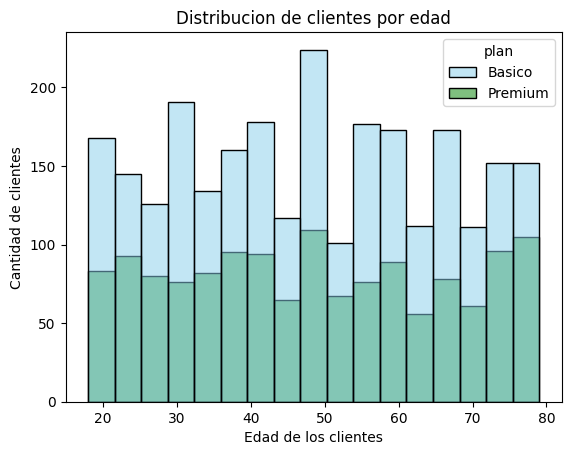

In [114]:
# Histograma para visualizar la edad (age)
sns.histplot(data=user_profile, x='age', hue='plan', palette=['skyblue','green'])
plt.xlabel('Edad de los clientes')
plt.ylabel('Cantidad de clientes')
plt.title('Distribucion de clientes por edad')
plt.show()

💡Insights: 
- En todos los rangos de edad, el plan Básico supera al plan Premium en cantidad de clientes. Esto es especialmente notorio en el segmento de los 45 a 50 años, donde la brecha entre ambos planes es más amplia, sugiriendo que el plan Básico es el producto dominante en el mercado para estas edades.

- Los usuarios Premium muestran una estabilidad mayor a lo largo del tiempo, mientras que los usuarios del plan Básico tienen fluctuaciones más marcadas (picos y valles más pronunciados).

- Los datos muestran una distribución simétrica, ya que no se muestra una "cola" larga hacia los jovenes ni hacia los adultos mayores.

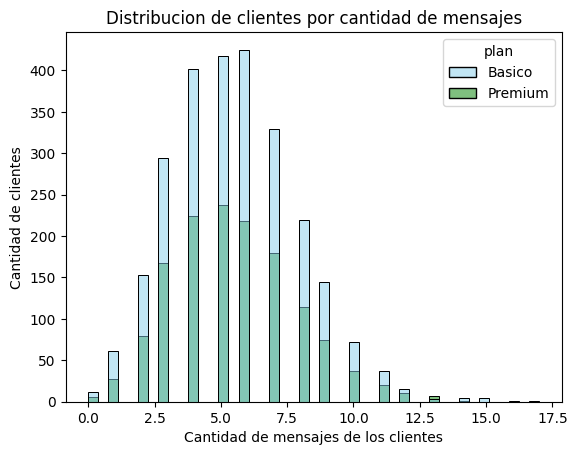

In [116]:
# Histograma para visualizar la cant_mensajes
sns.histplot(data=user_profile, x='cant_mensajes', hue='plan', palette=['skyblue','green'])
plt.xlabel('Cantidad de mensajes de los clientes')
plt.ylabel('Cantidad de clientes')
plt.title('Distribucion de clientes por cantidad de mensajes')
plt.show()

💡Insights: 
- Los usuarios del plan Básico tienden a enviar una mayor cantidad de mensajes en volumen total, concentrándose fuertemente entre los 4 y 7 mensajes.

- Existe un comportamiento muy similar en el uso de mensajería para ambos planes; sin embargo, el plan Premium muestra su mayor actividad en el rango de los 5 mensajes, mientras que el plan Básico alcanza su pico máximo un poco después, a los 6 mensajes.

- Es una distribución Sesgada a la derecha (Sesgo Positivo). La mayor parte de los datos se agrupa en los valores bajos (lado izquierdo, entre 2 y 7 mensajes), y la gráfica presenta una "cola" larga que se extiende hacia los valores más altos a la derecha (de 10 a 17 mensajes). Esto indica que la media es mayor que la mediana, ya que los pocos usuarios que envían muchos mensajes "jalan" el promedio hacia arriba.

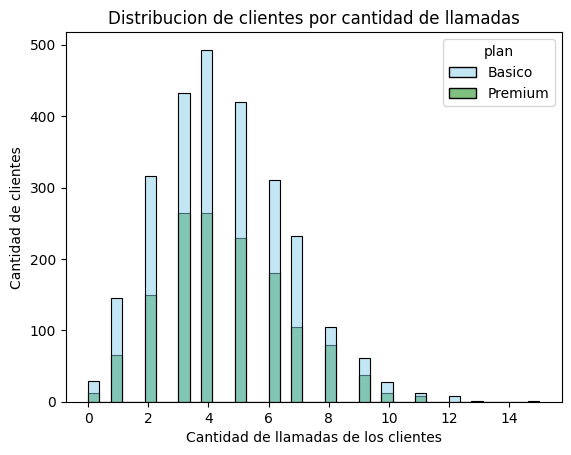

In [117]:
# Histograma para visualizar la cant_llamadas
sns.histplot(data=user_profile, x='cant_llamadas', hue='plan', palette=['skyblue','green'])
plt.xlabel('Cantidad de llamadas de los clientes')
plt.ylabel('Cantidad de clientes')
plt.title('Distribucion de clientes por cantidad de llamadas')
plt.show()

💡Insights: 
- Los usuarios del plan Básico realizan una mayor cantidad de llamadas en comparación con el plan Premium en casi todos los niveles de frecuencia. El punto de mayor actividad para los usuarios del plan Básico se encuentra exactamente en las 4 llamadas.

- Ambos planes comparten un comportamiento muy similar en cuanto a hábitos de uso; sin embargo, el plan Premium tiene su pico máximo de usuarios un poco antes, entre las 3 y 4 llamadas. A medida que aumenta la cantidad de llamadas (más de 8), la diferencia de volumen entre ambos planes se reduce drásticamente.

- Es notable que el plan Básico tiene una presencia mucho más fuerte que el Premium en el rango de 4 a 6 llamadas, lo que indica que su base de usuarios es más activa en el uso del servicio telefónico estándar.

- Es una distribución Sesgada a la derecha (Sesgo Positivo). La mayor concentración de clientes se agrupa en la parte baja de la escala (entre 2 y 6 llamadas). La gráfica presenta una "cola" que se extiende hacia la derecha, llegando hasta las 15 llamadas, donde la cantidad de usuarios es mínima. Esto indica que la gran mayoría de la población hace pocas llamadas, mientras que un grupo muy reducido de usuarios realiza una cantidad significativamente mayor.

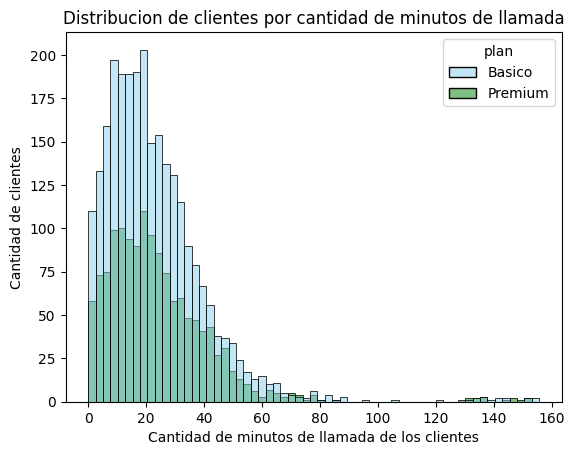

In [118]:
# Histograma para visualizar la cant_minutos_llamada
sns.histplot(data=user_profile, x='cant_minutos_llamada', hue='plan', palette=['skyblue','green'])
plt.xlabel('Cantidad de minutos de llamada de los clientes')
plt.ylabel('Cantidad de clientes')
plt.title('Distribucion de clientes por cantidad de minutos de llamada')
plt.show()

💡Insights: 
- Dentro del plan Básico, existe una mayor proporción de usuarios que consumen entre 10 y 25 minutos de llamada, con un pico máximo muy marcado alrededor de los 20 minutos.

- Ambos planes muestran una caída drástica en la cantidad de clientes a medida que el tiempo de llamada supera los 40 minutos.

- Se observa un pequeño grupo de "outliers" o usuarios atípicos en ambos planes que realizan llamadas extremadamente largas, superando los 130 minutos, aunque representan una fracción mínima de la base total.

- Es una distribución Sesgada a la derecha (Sesgo Positivo). La gran mayoría de los datos se agrupa en el extremo izquierdo de la gráfica (entre 0 y 40 minutos). Presenta una "cola" muy larga que se extiende hacia la derecha hasta llegar casi a los 160 minutos, lo que indica que pocos usuarios consumen una cantidad muy alta de minutos.

### 5.2 Identificación de Outliers

🎯 **Objetivo:**  
Detectar valores extremos en las variables clave de **uso** y **clientes** que podrían afectar el análisis, y decidir si requieren limpieza o revisión adicional.

**Instrucciones:**  
- Usa **boxplots** para identificar visualmente outliers en las siguientes columnas:  
  - `age` 
  - `cant_mensajes`
  - `cant_llamadas`
  - `total_minutos_llamada`  
- Crea un **for** para generar los 4 boxplots automáticamente.
<br>

- Después de crear los gráfico, responde si **existen o no outliers** en las variables.  
- Si hay outliers, crea otro bucle para calcular los límites de esas columnas usando el **método IQR** y decide qué hacer con ellos.
  - Si solamente hay outliers de un solo lado, no es necesario calcular ambos límites.

**Hint:**
- Dentro del bucle, usa `plt.title(f'Boxplot: {col}')` para que el título cambie acorde a la columna.

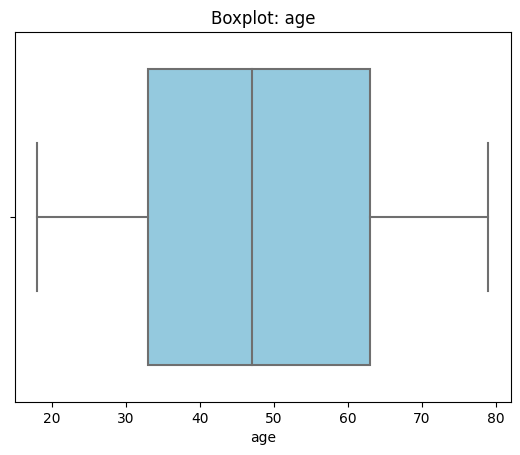

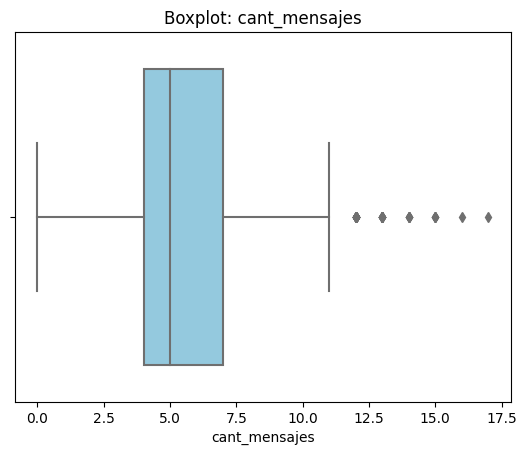

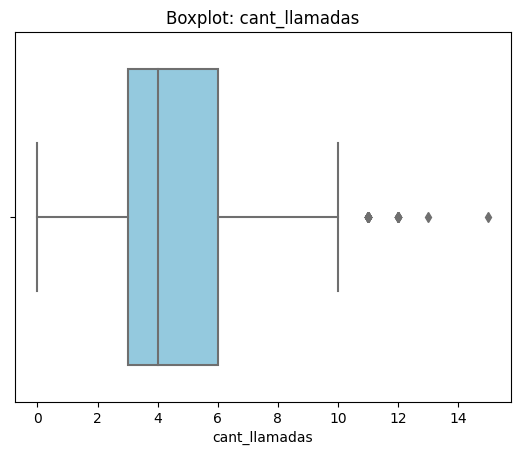

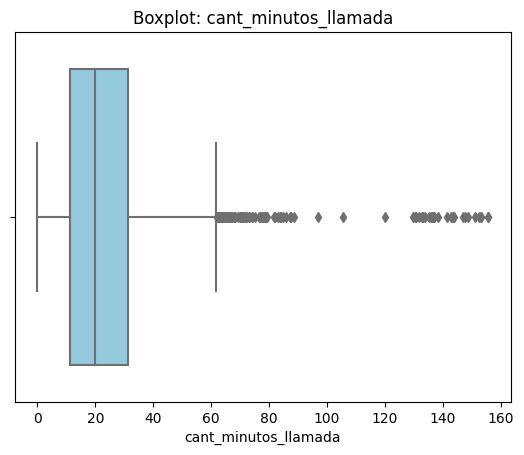

In [121]:
# Visualizando usando BoxPlot 
columnas_numericas = ['age', 'cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']

for col in columnas_numericas:
    sns.boxplot(x=user_profile[col], color='skyblue')
    plt.xlabel(col)
    plt.title(f'Boxplot: {col}')
    plt.show()

💡Insights: 
- Age: No existen outliers. La distribución se mantiene completamente dentro de los bigotes, abarcando desde aproximadamente los 18 hasta cerca de los 80 años sin valores aislados fuera de ese rango.
- cant_mensajes: Sí existen outliers. Se observan múltiples puntos individuales a la derecha del bigote superior, comenzando aproximadamente desde los 12 mensajes hasta alcanzar un máximo cercano a los 17 mensajes.
- cant_llamadas: Sí existen outliers. Se identifican cuatro valores atípicos claros a la derecha del gráfico. Estos representan a usuarios que realizan 11, 12, 13 y 15 llamadas, quedando fuera del rango típico de la mayoría.
- cant_minutos_llamada: Sí existen outliers (abundantes). Esta variable presenta la mayor cantidad de valores atípicos. Hay una concentración densa de puntos que comienza después de los 60 minutos y se extiende de forma dispersa hasta casi los 160 minutos.

In [124]:
# Calcular límites con el método IQR
columnas_limites = ['cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']

for col in columnas_limites:
    Q1 = user_profile[col].quantile(0.25)
    Q3 = user_profile[col].quantile(0.75)
    IQR = Q3 - Q1
    limite_superior = Q3 + 1.5 * IQR
    print(f'Limite Superior {col}: ', limite_superior)

Limite Superior cant_mensajes:  11.5
Limite Superior cant_llamadas:  10.5
Limite Superior cant_minutos_llamada:  61.8575


In [125]:
# Revisa los limites superiores y el max, para tomar la decisión de mantener los outliers o no
user_profile[columnas_limites].describe()

,cant_mensajes,cant_llamadas,cant_minutos_llamada
count,3999.000000,3999.000000,3999.000000
mean,5.524381,4.478120,23.317054
std,2.358416,2.144238,18.168095
min,0.000000,0.000000,0.000000
25%,4.000000,3.000000,11.120000
50%,5.000000,4.000000,19.780000
75%,7.000000,6.000000,31.415000
max,17.000000,15.000000,155.690000


💡Insights: 
- cant_mensajes: Mantener. El límite matemático es 11.5, pero el valor máximo es 17. Como la diferencia es muy pequeña (solo 5 o 6 mensajes de diferencia), no se consideran errores. Son simplemente personas que chatean un poco más de lo normal, y borrarlos sería quitarle realismo a tus datos.
- cant_llamadas: Mantener. El límite es 10.5 y el máximo es 15. Al igual que con los mensajes, estos "outliers" están muy cerca del resto del grupo. Representan a clientes reales que hacen un par de llamadas extra al día; no hay razón para pensar que los datos están mal registrados.
- cant_minutos_llamada: Mantener. Aunque el límite matemático es 61.85, tenemos usuarios que llegan hasta los 155.69 minutos. A pesar de ser una diferencia grande, estos casos no son errores, sino que representan a los "Súper Usuarios" del servicio. En el histograma y boxplot se ve que estos valores forman una "cola" continua de clientes que hablan mucho; borrarlos sería ignorar al grupo que más consume y que más ingresos podría generar a la empresa.

---

## 🧩Paso 6: Segmentación de Clientes

### 6.1 Segmentación de Clientes Por Uso

🎯 **Objetivo:** Clasificar a cada usuario en un grupo de uso (Bajo uso, Uso medio, Alto uso) basándose en la cantidad de llamadas y mensajes registrados.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_uso` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones de llamadas y mensajes y asigna:
  - `'Bajo uso'` cuando llamadas < 5 y mensajes < 5
  - `'Uso medio'` cuando llamadas < 10 y mensajes < 10
  - `'Alto uso'` para el resto de casos

In [126]:
# Crear columna grupo_uso
def segmentar_uso(row):
    llamadas = row['cant_llamadas']
    mensajes = row['cant_mensajes']
    
    # Condición 1: Bajo uso
    if llamadas < 5 and mensajes < 5:
        return 'Bajo uso'
    
    # Condición 2: Uso medio
    elif llamadas < 10 and mensajes < 10:
        return 'Uso medio'
    
    # Condición 3: El resto
    else:
        return 'Alto uso'
    
user_profile['grupo_uso'] = user_profile.apply(segmentar_uso, axis=1)

In [127]:
# verificar cambios
user_profile.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada,grupo_uso
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,7,3,23.70,Uso medio
1,10001,Mateo,Torres,53.0,<NA>,2022-01-01 06:34:17.914478619,Basico,NaN,5,10,33.18,Alto uso
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5,2,10.74,Uso medio
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11,3,8.99,Alto uso
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4,3,8.01,Bajo uso


### 6.2 Segmentación de Clientes Por Edad

🎯 **Objetivo:**: Clasificar a cada usuario en un grupo por **edad**.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_edad` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones y asigna:
  - `'Joven'` cuando age < 30
  - `'Adulto'` cuando age < 60
  - `'Adulto Mayor'` para el resto de casos

In [128]:
# Crear columna grupo_edad
def segmentar_edad(row):
    edad = row['age']

    if edad < 30:
        return 'Joven'

    elif edad < 60:
        return 'Adulto'

    else:
        return 'Adulto Mayor'

user_profile['grupo_edad'] = user_profile.apply(segmentar_edad, axis=1)

In [129]:
# verificar cambios
user_profile.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada,grupo_uso,grupo_edad
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,7,3,23.70,Uso medio,Adulto
1,10001,Mateo,Torres,53.0,<NA>,2022-01-01 06:34:17.914478619,Basico,NaN,5,10,33.18,Alto uso,Adulto
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5,2,10.74,Uso medio,Adulto
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11,3,8.99,Alto uso,Adulto Mayor
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4,3,8.01,Bajo uso,Adulto Mayor


### 6.3 Visualización de la Segmentación de Clientes

🎯 **Objetivo:** Visualizar la distribución de los usuarios según los grupos creados: **grupo_uso** y **grupo_edad**.

**Instrucciones:**  
- Crea dos gráficos para las variables categóricas `grupo_uso` y `grupo_edad`.
- Agrega título y etiquetas a los ejes en cada gráfico.

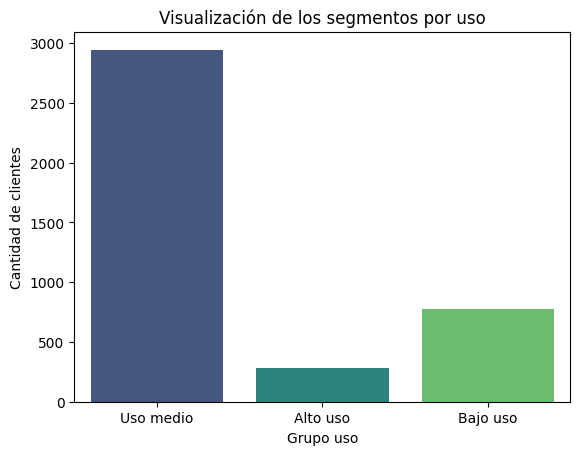

In [130]:
# Visualización de los segmentos por uso
sns.countplot(data=user_profile, x='grupo_uso', palette='viridis')
plt.xlabel('Grupo uso')
plt.ylabel('Cantidad de clientes')
plt.title('Visualización de los segmentos por uso')
plt.show()

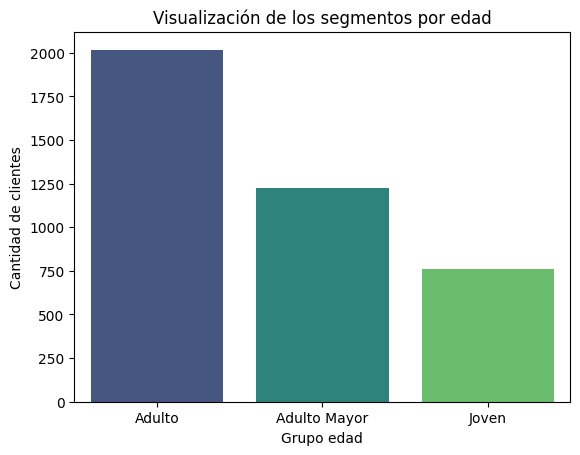

In [131]:
# Visualización de los segmentos por edad
sns.countplot(data=user_profile, x='grupo_edad', palette='viridis')
plt.xlabel('Grupo edad')
plt.ylabel('Cantidad de clientes')
plt.title('Visualización de los segmentos por edad')
plt.show()


---
## 🧩Paso 7: Insight Ejecutivo para Stakeholders

🎯 **Objetivo:** Traducir los hallazgos del análisis en conclusiones accionables para el negocio, enfocadas en segmentación, patrones de uso y oportunidades comerciales.

**Preguntas a responder:** 
- ¿Qué problemas tenían originalmemte los datos?¿Qué porcentaje, o cantidad de filas, de esa columna representaban?


- ¿Qué segmentos de clientes identificaste y cómo se comportan según su edad y nivel de uso?  
- ¿Qué segmentos parecen más valiosos para ConnectaTel y por qué?  
- ¿Qué patrones de uso extremo (outliers) encontraste y qué implican para el negocio?


- ¿Qué recomendaciones harías para mejorar la oferta actual de planes o crear nuevos planes basados en los segmentos y patrones detectados?

✍️ **Escribe aquí tu análisis ejecutivo:**

### Análisis ejecutivo

⚠️ **Problemas detectados en los datos**

**Valores Nulos Significativos:**

- churn_date (en users): Un 88.35% (3,534 filas) de los datos eran nulos. Esto es normal, ya que indica clientes que aún están activos, por lo que no se eliminaron.

- city (en users): Un 11.72% (469 filas) presentaba valores nulos o "sentinels" como "?".

- duration y length (en usage): Aproximadamente el 55% y 44% respectivamente eran nulos, debido a que el dataset mezcla llamadas (que no tienen "length") y mensajes (que no tienen "duration").

**Valores Inválidos (Sentinels):**

- age: Se detectó el valor -999 como un error de captura, afectando la desviación estándar de la columna.

- city: Uso de caracteres como "?" para datos desconocidos.

**Fechas Imposibles:** Se identificaron registros con fechas en el año 2026, lo cual es inconsistente ya que el estudio solo abarca hasta 2024.

🔍 **Segmentación de Clientes**
- Bajo Uso: Clientes con menos de 5 llamadas y 5 mensajes. Suelen ser usuarios pasivos o que utilizan principalmente datos móviles.

- Uso Medio: Clientes entre 5 y 10 llamadas/mensajes. Es el segmento más equilibrado y el que mejor se ajusta al Plan Básico.

- Alto Uso: Usuarios que superan los 10 registros. Se comportan de forma extrema en minutos de llamada (hasta 155 min) y mensajes (hasta 17).

- Comportamiento por Edad: La población es mayoritariamente adulta (mediana de 47 años), sin una diferencia drástica de consumo entre jóvenes y mayores, lo que sugiere un producto de consumo masivo.

📊 **Segmentos Valiosos y Patrones de Uso Extremo (Outliers)**
- **Segmento más valioso:** Los usuarios de "Alto Uso" que actualmente están en el Plan Básico. Estos clientes generan ingresos adicionales por cargos excedentes, pero corren el riesgo de irse (churn) si no se les ofrece un plan que cubra mejor sus necesidades.

- **Outliers encontrados:**

- Llamadas: Usuarios que realizan hasta 15 llamadas (frente a un límite normal de 10).

- Minutos: Casos extremos de hasta 155 minutos de llamada, cuando el promedio es de solo 23.

- **Implicación para el negocio:** Estos outliers no son errores, sino "Súper Usuarios". Representan la carga máxima de la red y son los candidatos ideales para el Plan Premium.

💡 **Recomendaciones**
- **Migración Dirigida (Upselling):** Crear una campaña para los clientes de "Alto Uso" en el Plan Básico, demostrándoles que el Plan Premium (con 600 minutos y 500 mensajes incluidos) reduciría sus costos mensuales totales.

- **Nuevo "Plan Social":** Dado que los mensajes (text) son más frecuentes que las llamadas (22,092 vs. 17,908), se podría ofrecer un plan económico con mensajes ilimitados pero minutos restringidos.

- **Ajuste de Beneficios en Básico:** El plan básico actual incluye 100 minutos, pero el límite de "uso normal" detectado es de apenas ~62 minutos. Se podría reducir la cuota de minutos incluidos para bajar el precio base y atraer a más clientes de "Bajo Uso".

---

## 🧩Paso 8 Cargar tu notebook y README a GitHub

🎯 **Objetivo:**  
Entregar tu análisis de forma **profesional**, **documentada** y **versionada**, asegurando que cualquier persona pueda revisar, ejecutar y entender tu trabajo.



### Opción A : Subir archivos desde la interfaz de GitHub (UI)

1. Descarga este notebook (`File → Download .ipynb`).  
2. Entra a tu repositorio en GitHub (por ejemplo `telecom-analysis` o `sprint7-final-project`).  
3. Sube tu notebook **Add file → Upload files**.  

---

### Opción B : Guardar directo desde Google Colab

1. Abre tu notebook en Colab.  
2. Ve a **File → Save a copy in GitHub**.  
3. Selecciona el repositorio y la carpeta correcta (ej: `notebooks/`).  
4. Escribe un mensaje de commit claro, por ejemplo:  
    - `feat: add final ConnectaTel analysis`
    - `agregar version final: Análisis ConnectaTel`
5. Verifica en GitHub que el archivo quedó en el lugar correcto y que el historial de commits se mantenga limpio.

---

Agrega un archivo `README.md` que describa de forma clara:
- el objetivo del proyecto,  
- los datasets utilizados,  
- las etapas del análisis realizadas,  
- cómo ejecutar el notebook (por ejemplo, abrirlo en Google Colab),  
- una breve guía de reproducción.
---

Link a repositorio público del proyecto: `LINK a tu repo aquí`